In [1]:
# -*- coding: utf-8 -*-
"""Example for R-graph
"""
# Author: Michiel Bongaerts (but not author of the R-graph method)
# License: BSD 2 clause


from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.rgraph import RGraph
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

import seaborn as sns
import matplotlib.pyplot as plt


On Training Data:
R-graph ROC:0.325, precision @ rank n:0.0

On Test Data:
R-graph ROC:0.4, precision @ rank n:0.0


C:\Users\michi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\michi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


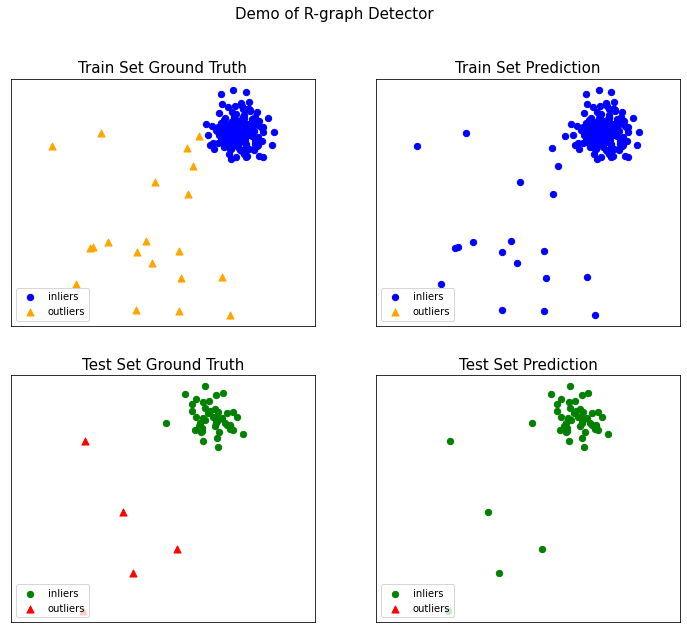

In [58]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 50  # number of testing points

# Generate sample data
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features=2,
    contamination=contamination,
    behaviour="new",
    random_state=42,
)

# train R-graph detector
clf_name = 'R-graph'
clf = RGraph(n_nonzero = 25, transition_steps = 20 , gamma = 50, gamma_nz = True,
             tau = 1, preprocessing=True, active_support = True,
             algorithm= 'lasso_lars', maxiter= 40, verbose =0 )

clf.fit(X_train)


# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# # visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)


Text(0.5, 1.0, 'Distribution of outlier scores')

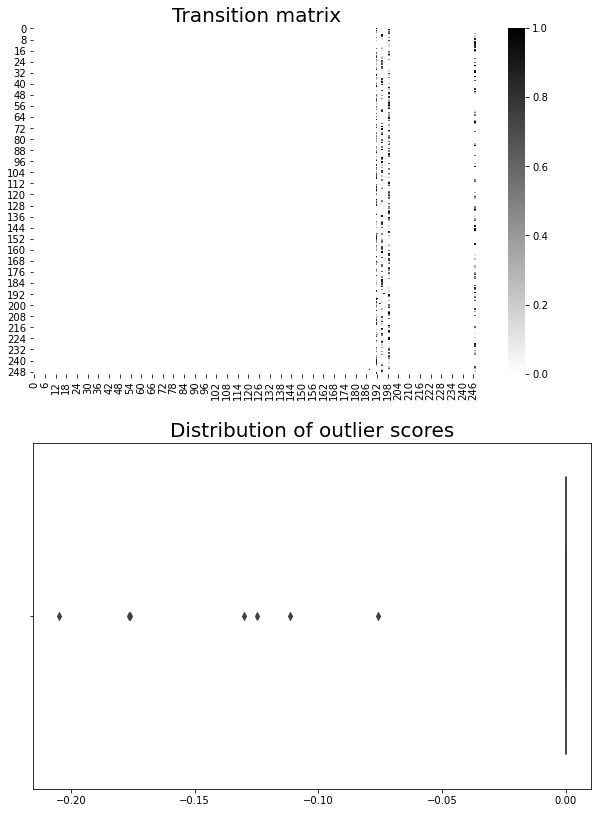

In [59]:
fig = plt.figure( figsize = (10,14))
ax = fig.add_subplot(2,1,1)
sns.heatmap( clf.P ,ax =ax, cmap = 'binary')
ax.set_title('Transition matrix', fontsize= 20)

ax = fig.add_subplot(2,1,2)
sns.boxplot( clf.decision_scores_ )
ax.set_title('Distribution of outlier scores', fontsize= 20)